<a href="https://colab.research.google.com/github/SowjanyaKiran/Timeseries_tesladataset_sowjanya/blob/main/Time_Series_Forecasting_TESLA_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
#Getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [4]:
#Performing EDA
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
#Summarize the Dataset
df.shape

(2956, 7)

In [6]:
#converting "Date" to date time
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


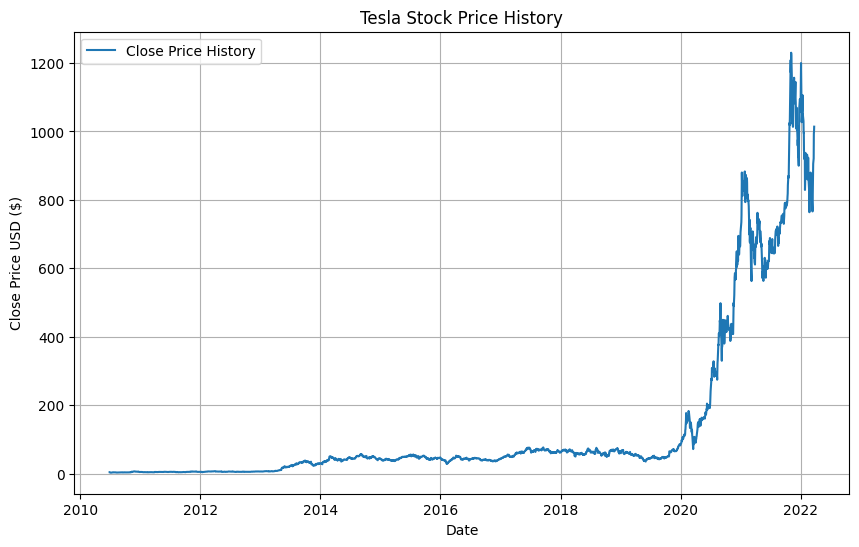

In [8]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price History')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid()
plt.show()

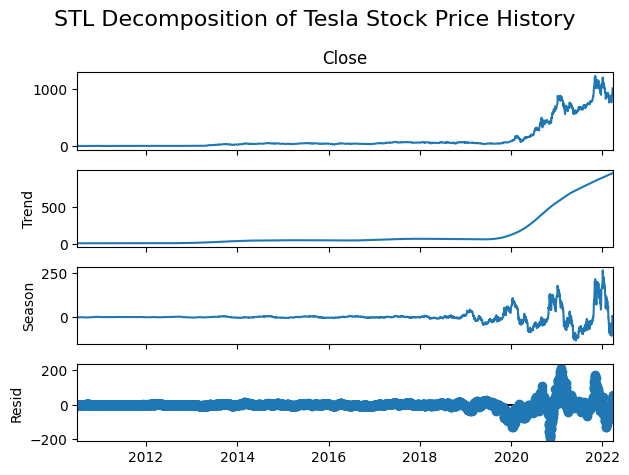

In [14]:
#STL Decompostion
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Use 'Close' or 'Adj Close' for analysis
series = df['Close']

# Apply STL decomposition (choose period based on suspected seasonality)
stl = STL(series, period=250)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Tesla Stock Price History", fontsize=16)
plt.tight_layout()
plt.show()

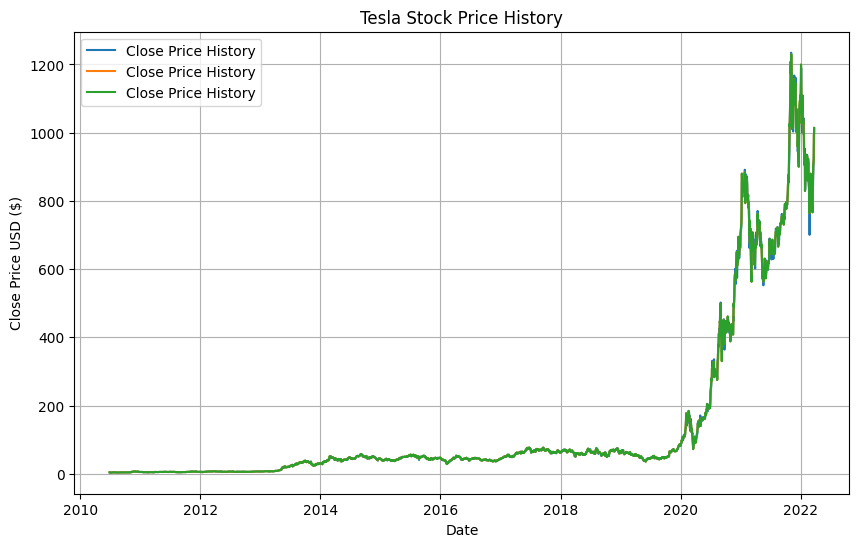

In [15]:
#plot
plt.figure(figsize=(10,6))
plt.plot(df[['Open', 'Close', 'Adj Close']], label='Close Price History')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid()
plt.show()

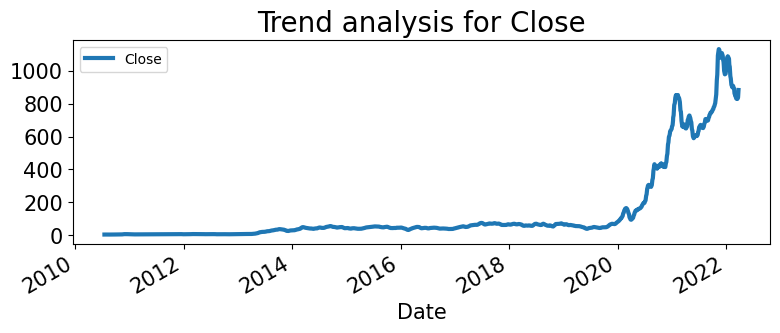

In [16]:
#Check for trend
close = df[['Close']]
close.rolling(12).mean().plot(figsize = (9,3) , linewidth =3 , fontsize =15)
plt.title('Trend analysis for Close' , fontsize =20)
plt.xlabel('Date' , fontsize =15)
plt.show()

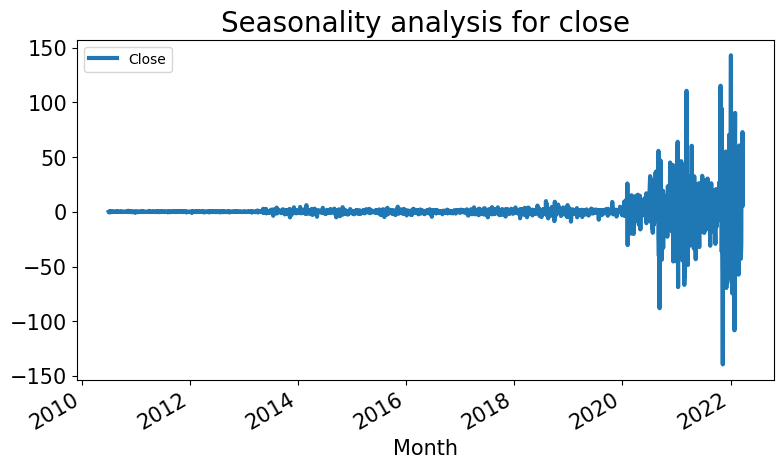

In [17]:
#Check for seasonality
close.diff().plot(figsize =(9, 5) , linewidth =3 , fontsize =15)
plt.title('Seasonality analysis for close' , fontsize =20)
plt.xlabel('Month' , fontsize =15)
plt.show()

In [18]:
#ARIMA for close prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2956
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11329.162
Date:                Thu, 24 Jul 2025   AIC                          22664.324
Time:                        08:27:23   BIC                          22682.298
Sample:                             0   HQIC                         22670.794
                               - 2956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3716     54.589     -0.007      0.995    -107.364     106.621
ma.L1          0.3715     54.591      0.007      0.995    -106.626     107.369
sigma2       125.1982      0.717    174.698      0.0

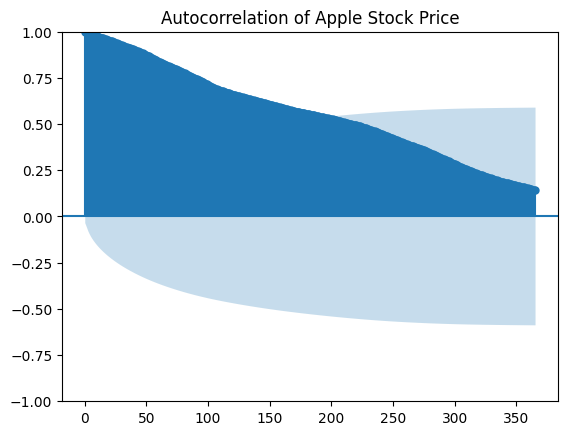

In [19]:
#ACP plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=365, title="Autocorrelation of Tesla Stock Price")
plt.show()

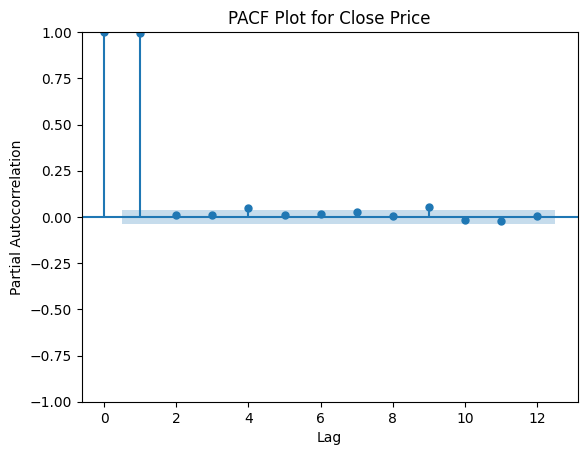

In [20]:
#PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

# Pass only the 'Close' column as a Series
plot_pacf(close['Close'], lags=12)
plt.title('PACF Plot for Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(close['Close'])
print("📉 Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] <= 0.05:
    print("Data is stationary — you can use it directly for ARIMA.")
else:
    print("Data is NOT stationary — you should apply differencing.")

📉 Augmented Dickey-Fuller Test:
ADF Statistic: 1.4239415939225966
p-value: 0.9972202364261444
Data is NOT stationary — you should apply differencing.


In [22]:
#Fitting the ARIMA Model(Basic)
model_arima = ARIMA(close , order = (1,1,1))
model_arima_fit = model_arima.fit()
print('\nARIMA Model Summary:\n')
print(model_arima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Model Summary:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2956
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11329.162
Date:                Thu, 24 Jul 2025   AIC                          22664.324
Time:                        08:28:22   BIC                          22682.298
Sample:                             0   HQIC                         22670.794
                               - 2956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3716     54.589     -0.007      0.995    -107.364     106.621
ma.L1          0.3715     54.591      0.007      0.995    -106.626     107.369
sigma2       125.1982      0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


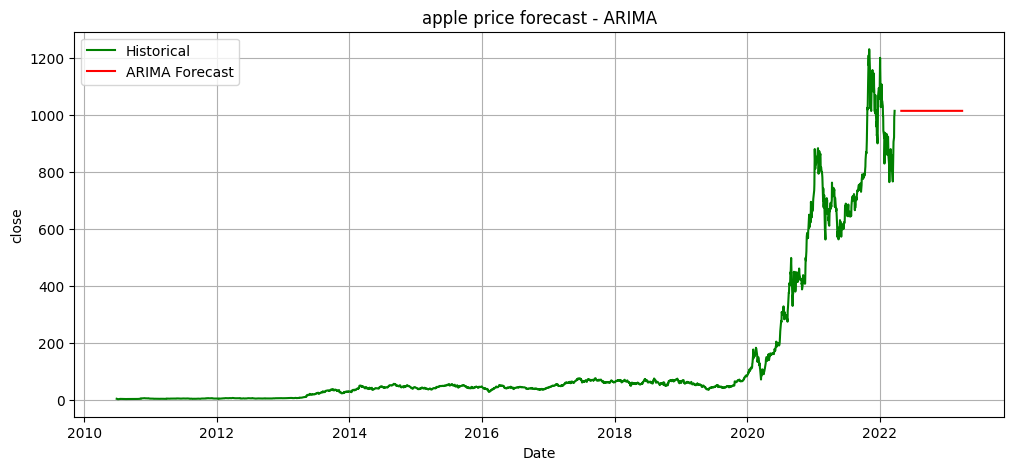

In [23]:
#Forecasting using ARIMA
forecast_arima = model_arima_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('Tesla price forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
#SARIMA for close prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2956
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -11329.162
Date:                Thu, 24 Jul 2025   AIC                          22664.324
Time:                        08:28:50   BIC                          22682.298
Sample:                             0   HQIC                         22670.794
                               - 2956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3716     54.589     -0.007      0.995    -107.364     106.621
ma.L1          0.3715     54.591      0.007      0.995    -106.626     107.369
sigma2       125.1982      0.717    174.698      0.0

In [25]:
#Fitting the SARIMA Model(Basic)
model_sarimax = SARIMAX(close, order = (1,1,1) , seasonal_order = (1,1,1,10))
model_sarimax_fit = model_sarimax.fit()
print('\nSARIMA Model Summary:\n')
print(model_sarimax_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



SARIMA Model Summary:

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2956
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood              -11310.605
Date:                            Thu, 24 Jul 2025   AIC                          22631.209
Time:                                    08:29:24   BIC                          22661.148
Sample:                                         0   HQIC                         22641.988
                                           - 2956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2943      0.427      0.689      0.491      -0.543       1.131
ma.L1      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


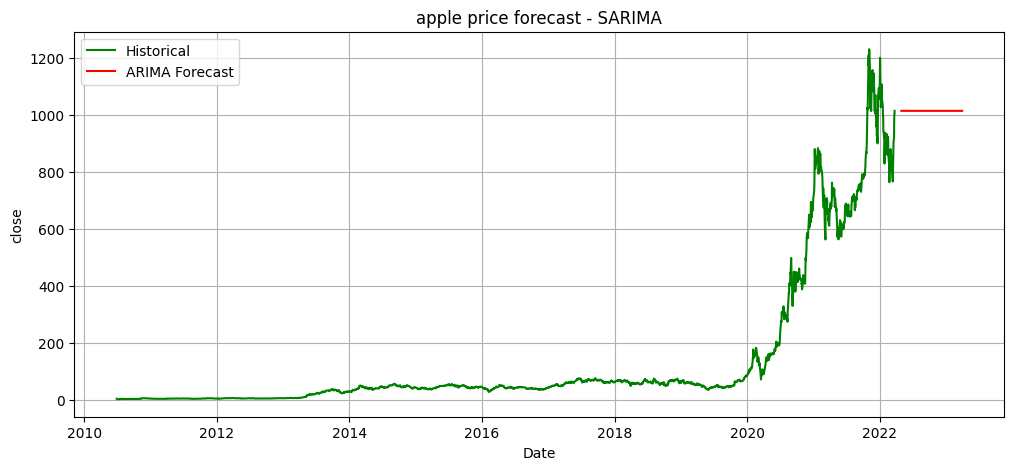

In [26]:
#Forecasting using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('Tesla price forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#Model comparison
print('Model comparison:')
print(f"ARIMA Model AIC : {model_arima_fit.aic}")
print(f"SARIMA Model AIC : {model_sarimax_fit.aic}")

#Select model based on lesser AIC
if model_arima_fit.aic < model_sarimax_fit.aic:
    print('\nARIMA Model is selected')
else:
    print('\nSARIMA Model is selected')

Model comparison:
ARIMA Model AIC : 22664.324016674444
SARIMA Model AIC : 22631.209149573253

SARIMA Model is selected


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation Metrics
forecast_steps = 30
actual = close['Close'][-forecast_steps:]

# Predict values from the model (retrain if needed for 30 steps)
model = ARIMA(close['Close'][:-forecast_steps], order=(1,1,1))
model_fit = model.fit()
predicted = model_fit.forecast(steps=forecast_steps)

# Ensure index aligns
predicted.index = actual.index

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Forecast Evaluation (ARIMA):
RMSE: 91.2393
MAE:  80.8632
MAPE: 9.66%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

✅ Forecast Evaluation (ARIMA):
RMSE: 91.2393
MAE:  80.8632
MAPE: 9.66%


In [30]:
# Evaluation Metrics
forecast_steps = 30
train_data = close['Close'][:-forecast_steps]
test_data = close['Close'][-forecast_steps:]
model_sarimax = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit()

# Forecast
forecast_sarima = model_sarimax_fit.forecast(steps=forecast_steps)

# Align forecast index to test data
forecast_sarima.index = test_data.index
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_sarima))
mae = mean_absolute_error(test_data, forecast_sarima)
mape = np.mean(np.abs((test_data - forecast_sarima) / test_data)) * 100

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
# Print results
print("✅ Forecast Evaluation (SARIMA):")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")

✅ Forecast Evaluation (SARIMA):
RMSE : 106.4382
MAE  : 93.4610
MAPE : 11.24%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


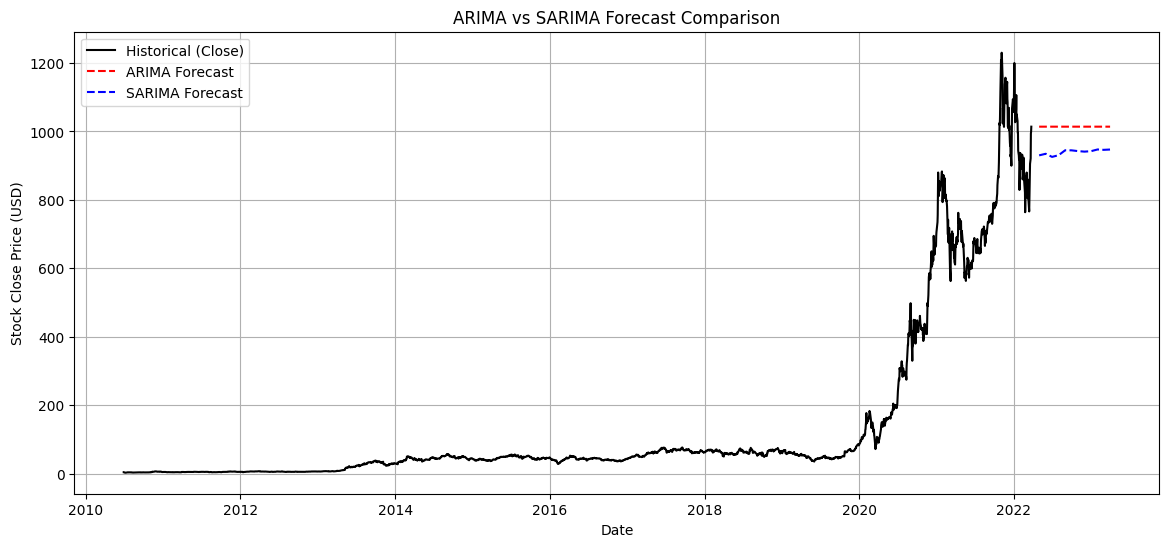

In [32]:
#Plot ARIMA vs SARIMA Forecast Comparison
import matplotlib.pyplot as plt
import pandas as pd

# Generate forecast index for next 12 months
forecast_index = pd.date_range(start=close.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Forecast using ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)

# Forecast using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps=12)

# Plot Historical Data + Both Forecasts
plt.figure(figsize=(14, 6))
plt.plot(close, label='Historical (Close)', color='black')
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_index, forecast_sarima, label='SARIMA Forecast', color='blue', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


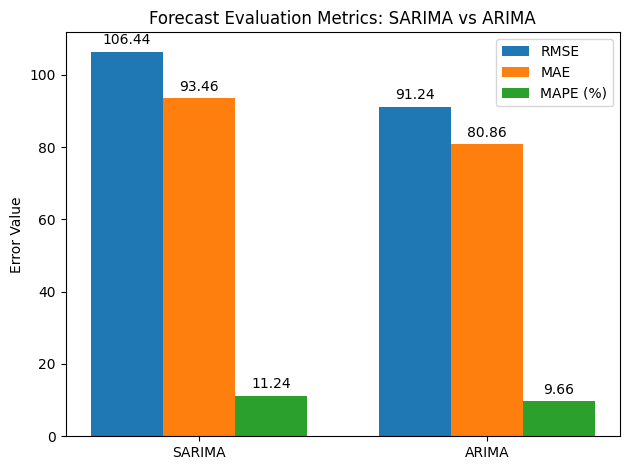

In [33]:
#Plot Forecast Evaluation Metrics: SARIMA vs ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ['SARIMA', 'ARIMA']
rmse = [106.4382, 91.2393]
mae = [93.4610, 80.8632]
mape = [11.24, 9.66]

x = np.arange(len(models))
width = 0.25

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, rmse, width, label='RMSE')
bars2 = ax.bar(x, mae, width, label='MAE')
bars3 = ax.bar(x + width, mape, width, label='MAPE (%)')

# Labels and title
ax.set_ylabel('Error Value')
ax.set_title('Forecast Evaluation Metrics: SARIMA vs ARIMA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()